In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

In [14]:
### Python code to extract Date from chat file 

def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [20]:
### Regex pattern to extract username of Author.
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [18]:
### Extracting Date, Time, Author and message from the chat file.
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

### Finally creating a dataframe and storing all data inside that dataframe.

In [40]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [43]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = 'C:/Users/Nivash/Desktop/Whatsapp Chat Analysis/WhatsApp Chat with 🐛🔥 Boys.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message =  getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
### changing datatype of "Date" column.
df["Date"] = pd.to_datetime(df["Date"])

In [44]:
### Checking head part of dataset
df.head(20)

,Date,Time,Author,Message
0,2021-06-25,9:20 PM,Dharanesh,Yen da
1,2021-06-25,9:59 PM,Dharanesh,Dei
2,2021-06-25,9:59 PM,Dharanesh,Epdi reappear exam ku apply panradhu
3,2021-06-26,5:38 PM,Nivash,Therliye😷
4,2021-06-26,5:38 PM,Nivash,Dei drive link share panra
5,2021-06-26,10:08 PM,Dharanesh,Panten da
6,2021-06-26,10:08 PM,Dharanesh,350 rupee
7,2021-06-27,7:59 AM,Nivash,350 ah ethana course pota
8,2021-06-27,1:11 PM,Dharanesh,Oru course dha
9,2021-06-27,1:11 PM,Dharanesh,Mth Mattu dha


In [24]:
### Checking shape of dataset.
df.shape

(13606, 4)

In [30]:
### Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13510 entries, 0 to 13509
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     13510 non-null  datetime64[ns]
 1   Time     13510 non-null  object        
 2   Author   13510 non-null  object        
 3   Message  13510 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 527.7+ KB


In [32]:
### Droping Nan values
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(13510, 4)

In [33]:
### Checking no. of authors of group
df['Author'].nunique()

3

In [34]:
### Checking authors of group
df['Author'].unique()

array(['Dharanesh', 'Nivash', 'Ranjith LPU'], dtype=object)

In [35]:
total_messages = df.shape[0]
print(total_messages)

13510


In [36]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [46]:
### Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.

weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)
### Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]
### Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')

In [51]:
df.head(20)

,Date,Day,Time,Author,Message
0,2021-06-25,Friday,9:20 PM,Dharanesh,Yen da
1,2021-06-25,Friday,9:59 PM,Dharanesh,Dei
2,2021-06-25,Friday,9:59 PM,Dharanesh,Epdi reappear exam ku apply panradhu
3,2021-06-26,Saturday,5:38 PM,Nivash,Therliye😷
4,2021-06-26,Saturday,5:38 PM,Nivash,Dei drive link share panra
5,2021-06-26,Saturday,10:08 PM,Dharanesh,Panten da
6,2021-06-26,Saturday,10:08 PM,Dharanesh,350 rupee
7,2021-06-27,Sunday,7:59 AM,Nivash,350 ah ethana course pota
8,2021-06-27,Sunday,1:11 PM,Dharanesh,Oru course dha
9,2021-06-27,Sunday,1:11 PM,Dharanesh,Mth Mattu dha


In [56]:
### Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)
### Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
### Looking updated dataset
df

,Date,Day,Time,Author,Message,Url_Count,Media_Count
0,2021-06-25,Friday,9:20 PM,Dharanesh,Yen da,0,0
1,2021-06-25,Friday,9:59 PM,Dharanesh,Dei,0,0
2,2021-06-25,Friday,9:59 PM,Dharanesh,Epdi reappear exam ku apply panradhu,0,0
3,2021-06-26,Saturday,5:38 PM,Nivash,Therliye😷,0,0
4,2021-06-26,Saturday,5:38 PM,Nivash,Dei drive link share panra,0,0
...,...,...,...,...,...,...,...
13601,2022-07-12,Tuesday,11:05 PM,Nivash,Inga moonu perum onnave potukala,0,0
13602,2022-07-12,Tuesday,11:07 PM,Dharanesh,Indha course ku ore dha pannanum,0,0
13603,2022-07-13,Wednesday,8:25 AM,Nivash,Ama,0,0
13604,2022-07-13,Wednesday,9:24 AM,None,Nivash: https://docs.google.com/forms/d/e/1FAI...,0,0


In [57]:
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 13510
Total Number of Media Messages : 0
Total Number of Links : 0


In [59]:
### Creates a list of unique Authors
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Dharanesh   ->   5325
Nivash   ->   6325
Ranjith LPU   ->   1860
None   ->   0


In [60]:
l = df.Day.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Friday   ->   2510
Saturday   ->   1577
Sunday   ->   961
Tuesday   ->   2364
Wednesday   ->   1367
Thrusday   ->   2217
Monday   ->   2610


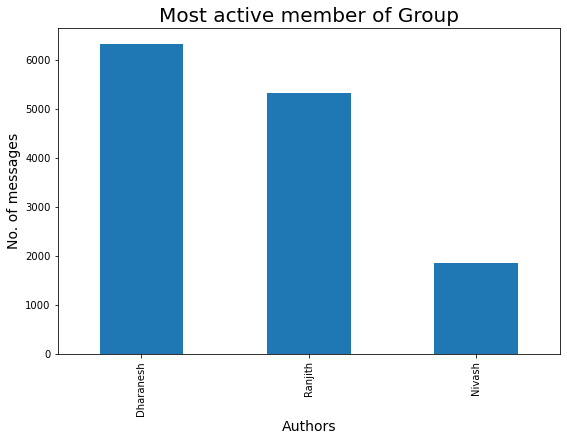

In [69]:
### Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = ['Dharanesh', 'Ranjith', 'Nivash']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Most active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()


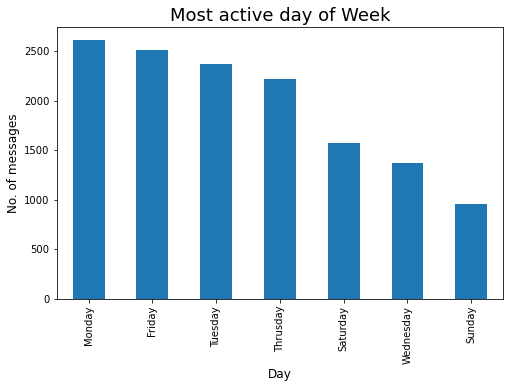

In [70]:
### Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most active day of Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()